In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from mpl_interactions import image_segmenter 

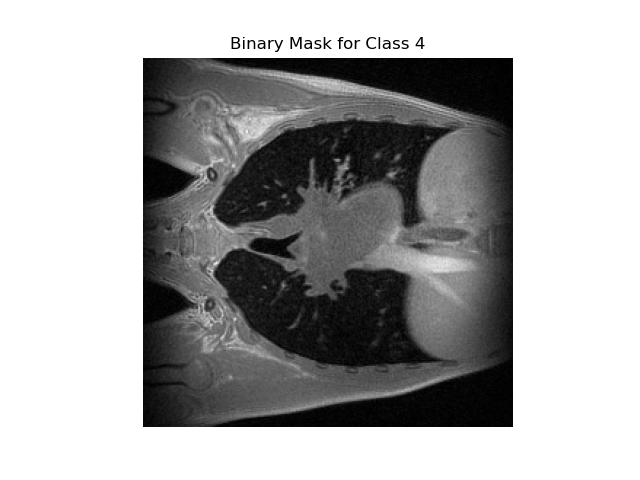

In [23]:
slice_2d = mpimg.imread('../../data/imrh_114a/slices/lammy0_slice120.png')
plt.imshow(slice_2d, cmap='gray')
plt.show()

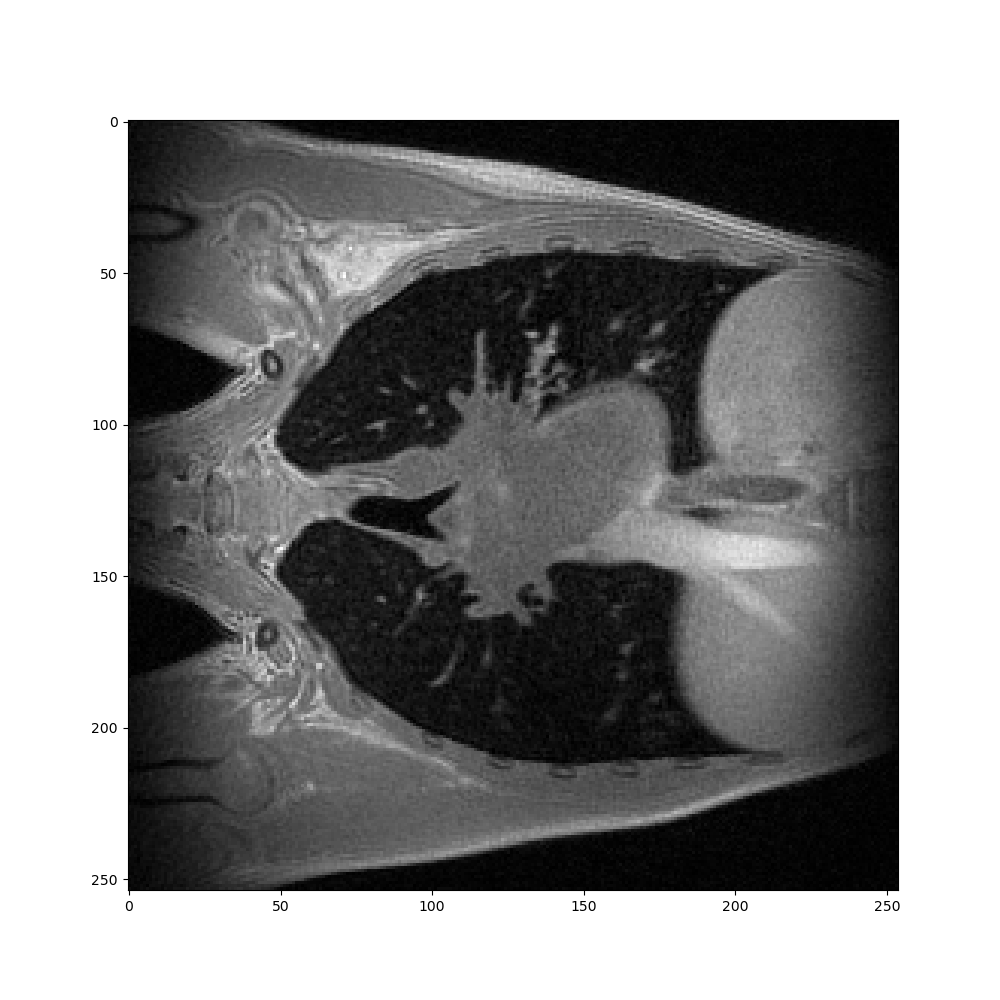

In [24]:
import ipywidgets as widgets

N_classes = 4
class_selector = widgets.Dropdown(options=list(range(1, N_classes + 1)), description="class")


def update(change):
    multi_class_segmenter.current_class = class_selector.value
    multi_class_segmenter.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
multi_class_segmenter = image_segmenter(slice_2d, nclasses=4, mask_alpha=0.65)
display(widgets.HBox([erasing_button, class_selector]))
display(multi_class_segmenter)

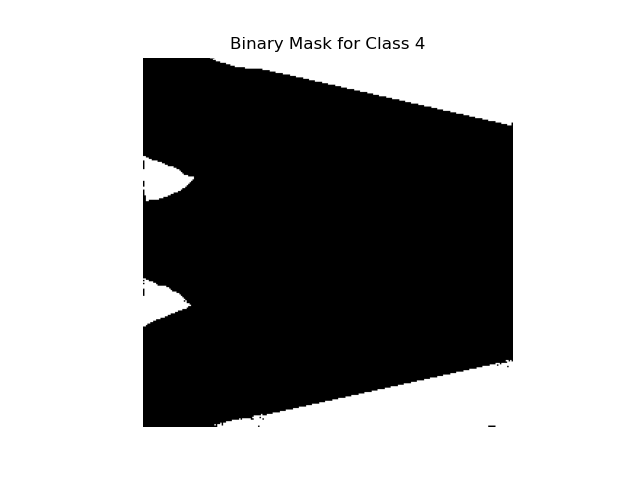

In [31]:
desired_class = 4
binary_mask = np.where(multi_class_segmenter.mask == desired_class, 1, 0)
plt.figure()
plt.imshow(binary_mask, cmap='gray')
plt.title(f"Binary Mask for Class {desired_class}")
plt.axis('off')
plt.show()

In [26]:
np.save('imrh_114a_slice120_parenchyma_mask.npy',binary_mask)

In [28]:
np.save('imrh_114a_slice120_trachea_mask.npy',binary_mask)

In [30]:
np.save('imrh_114a_slice120_aorta_mask.npy',binary_mask)

In [ ]:
np.save('imrh_114a_slice120_background_mask.npy',binary_mask)